# Pre-deposition simulation iPython notebook

Supplementary material for the IB Materials lectures on diffusion.
Silicon dopping case study

A Kabla, 2023

_______

This notebook provide a 1D discrete model of diffusion in the context of the pre-deposition step.

The concentration profile $c(x,t)$ in the half space $x>=0$ is modelled as a 1D array where the index represents space. The spatial discretidation step $i$ represents the step size/mean free path $\lambda$. Furthermore, each time step represents the physical time $\tau$.

$$ c_{i,n} = c \; (x = i \lambda, \; t = n \tau)$$

Based on this, we can assume that, from one time step to the next, half of the particles at location $i$ went to the location on the left, and the other half on the right. This allows us to iteratively calculate the evolution of the concentration profile.

$$ c_{i,n+1} = \frac{1}{2} \left( c_{i-1,n} + c_{i+1,n}   \right)  $$

The boundary condition at $x=0$, $c(x=0,t) = C_s$ implies that at each time step we must reassign the value of $c_{0,n}$ to $C_s$.

In [6]:
# Load relevant modules

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import numpy as np
%config InlineBackend.figure_format = 'svg'

from matplotlib import rcParams
rcParams["font.size"] = "12"
rcParams['figure.figsize'] = 8, 8



In [7]:
imax = 500
nmax = 10001
Cs = 1.0

In [8]:
def run_model(imax, nmax, c0):
  c = np.zeros((imax+1,nmax))
  c[0,0] = c0
  for n in range(1,nmax):
    for i in range(1,imax-1):
      c[i,n] = 0.5*(c[i-1,n-1]+c[i+1,n-1])
    c[0,n] = Cs
    c[imax,n] = 0.5*c[imax-1,n]
  return(c)


In [9]:
c = run_model(imax, nmax, Cs)

Text(0, 0.5, 'concentration')

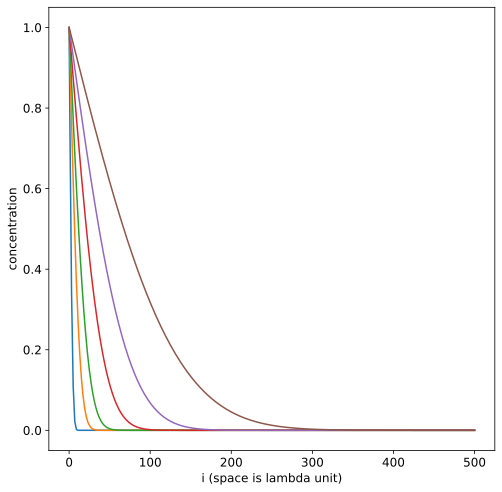

In [10]:
na = [10,100,300,1000,3000,10000]
for n in na:
  plt.plot(c[:,n])
plt.xlabel("i (space is lambda unit)")
plt.ylabel("concentration")


To get the amount of dopant deposited, we need to integrate each curve over space. This is done by integrating the array c along the $i$ axis, providing for each time $n$ the amount deposited.

Text(0, 0.5, 'amount deposited')

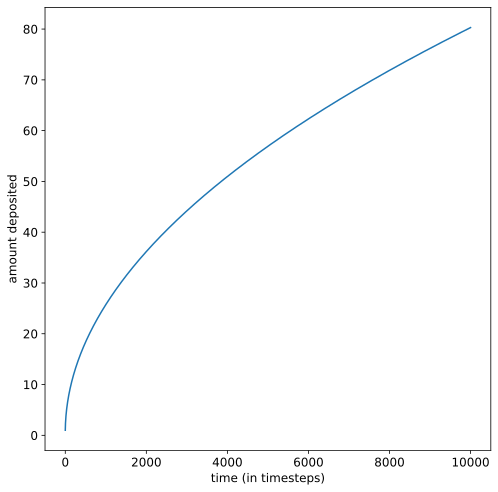

In [11]:
depos = np.sum(c,axis=0)
ta=range(0,nmax)
plt.plot(ta,depos)
plt.xlabel("time (in timesteps)")
plt.ylabel("amount deposited")


The box below shows that the amount deposited increases with $\sqrt{t}$ as expected.

Text(0, 0.5, 'amount deposited')

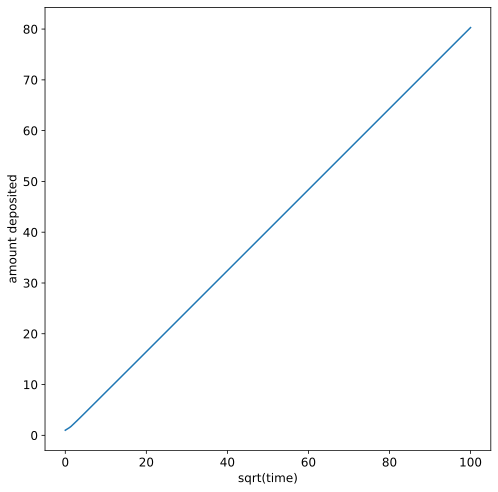

In [12]:
depos = np.sum(c,axis=0)
ta=range(0,nmax)
plt.plot(np.sqrt(ta),depos)
plt.xlabel("sqrt(time)")
plt.ylabel("amount deposited")


We can now validate the exact analytical expressions. In this 1D case:
$$ D = \frac{1}{2} \frac{\lambda^2}{\tau} = \frac{1}{2} $$
We know from the theory that the total amount of dopant should be:
$$ N(t) =  \frac{2 C_s \sqrt{D t}}{\sqrt{\pi}} $$

We verify this by ploting each side of the equation on a different axis.

Text(0, 0.5, 'amount deposited (numerical)')

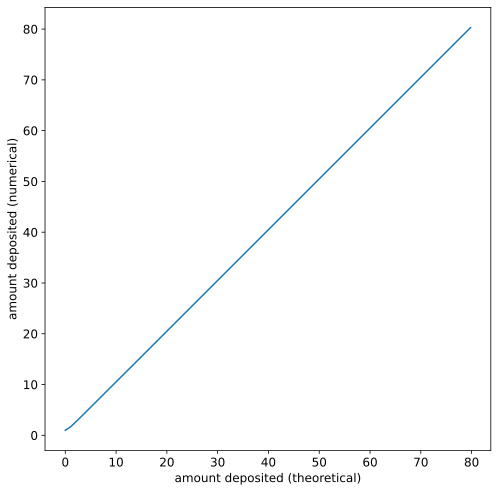

In [16]:
depos = np.sum(c,axis=0)
ta=range(0,nmax)
plt.plot(np.sqrt(ta)*2/np.sqrt(2*np.pi),depos)
plt.xlabel("amount deposited (theoretical)")
plt.ylabel("amount deposited (numerical)")

The box below tests the self-similarity of the curves - see IB Maths course on the topic when available.
It shows that if we rescale the x-axis values by $\sqrt{t}$, all the concentration profiles collapse on the same curve.

Text(0, 0.5, 'concentration')

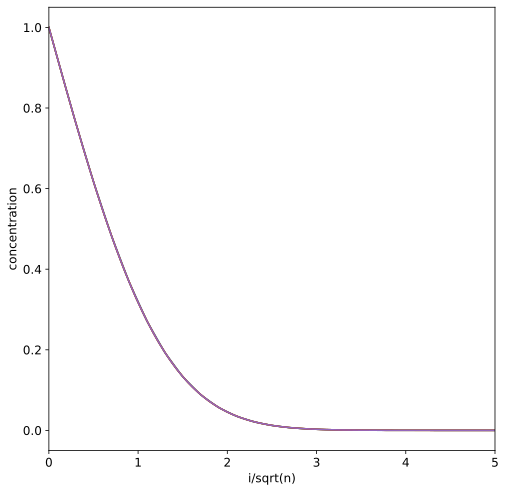

In [14]:
na = [100,300,1000,3000,10000]
for n in na:
  x=range(imax+1)/np.sqrt(n)
  plt.plot(x,c[:,n])
plt.xlim((0,5))
plt.xlabel("i/sqrt(n)")
plt.ylabel("concentration")